In [1]:
import pandas as pd
import numpy as np
import collections, re
import copy

from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

%matplotlib inline  

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
#print(train.head(15))
print(train.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [73]:
## exctract cabin letter
def Cabin_Process(input):
    if input!=input or input[0]=='T':
        return 'O'
    else:
        return input[0]
train['Cabin_l']= train['Cabin'].apply(Cabin_Process)

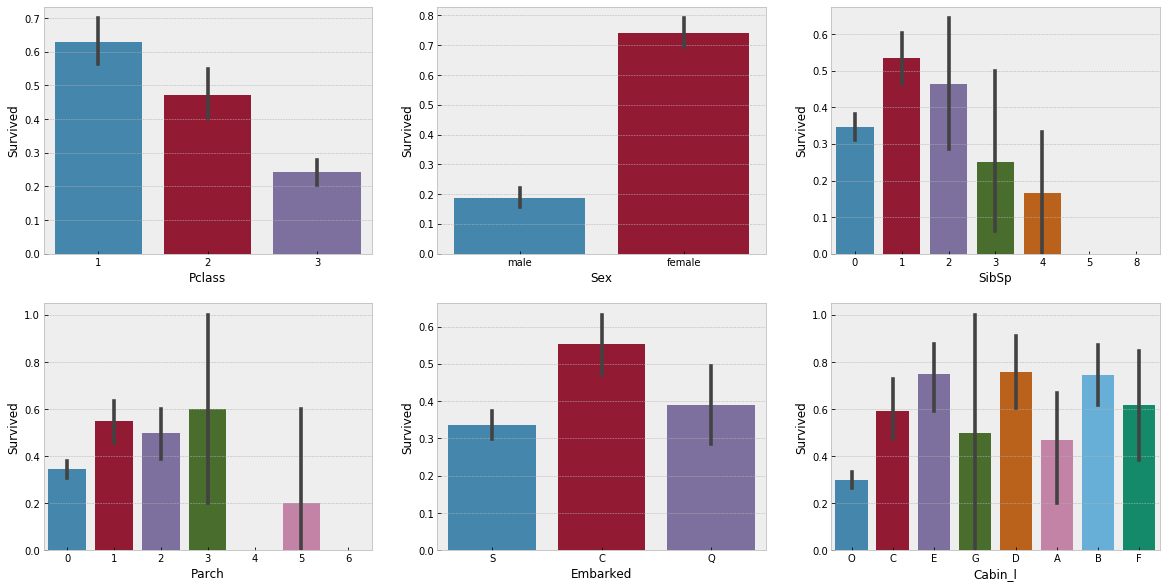

In [74]:
plain_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Cabin_l']
fig, ax = plt.subplots(nrows = 2, ncols = 3 ,figsize=(20,10))
start = 0
for j in range(2):
    for i in range(3):
        if start == len(plain_features):
            break
        sns.barplot(x=plain_features[start], y='Survived', data=train, ax=ax[j,i])
        start += 1

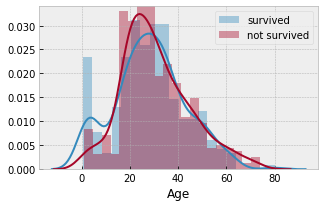

In [75]:
sv_lab = 'survived'
nsv_lab = 'not survived'
fig, ax = plt.subplots(figsize=(5,3))
ax = sns.distplot(train[train['Survived']==1].Age.dropna(), bins=20, label = sv_lab, ax = ax)
ax = sns.distplot(train[train['Survived']==0].Age.dropna(), bins=20, label = nsv_lab, ax = ax)
ax.legend()

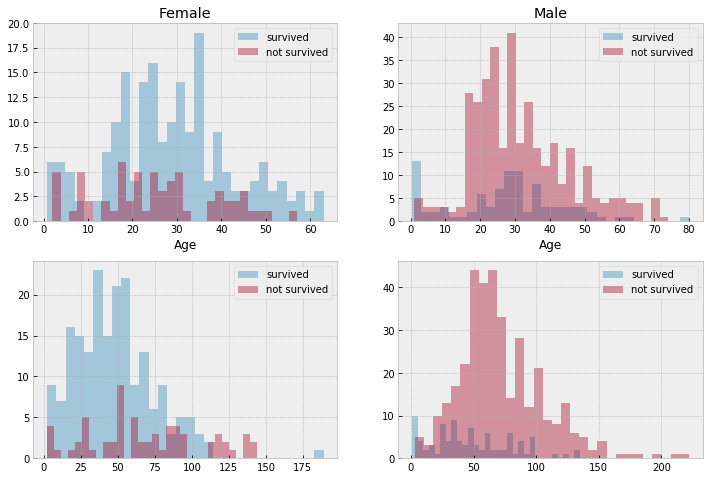

In [76]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))
females = train[train['Sex']=='female']
males = train[train['Sex']=='male']

ax = sns.distplot(females[females['Survived']==1].Age.dropna(), bins=30, label = sv_lab, ax = axes[0,0], kde =False)
ax = sns.distplot(females[females['Survived']==0].Age.dropna(), bins=30, label = nsv_lab, ax = axes[0,0], kde =False)
ax.legend()
_ = ax.set_title('Female')

ax = sns.distplot(males[males['Survived']==1].Age.dropna(), bins=30,  label = sv_lab, ax = axes[0,1], kde = False)
ax = sns.distplot(males[males['Survived']==0].Age.dropna(), bins=30,  label = nsv_lab, ax = axes[0,1], kde = False)
ax.legend()
_ = ax.set_title('Male')

fm_1=(females[females['Survived']==1].Age*females[females['Survived']==1].Pclass).dropna()
fm_0=(females[females['Survived']==0].Age*females[females['Survived']==0].Pclass).dropna()
m_1=(males[males['Survived']==1].Age*males[males['Survived']==1].Pclass).dropna()
m_0=(males[males['Survived']==0].Age*males[males['Survived']==0].Pclass).dropna()

ax = sns.distplot(fm_1, bins=30, label = sv_lab, ax = axes[1,0], kde =False)
ax = sns.distplot(fm_0, bins=30, label = nsv_lab, ax = axes[1,0], kde =False)
ax.legend()

ax = sns.distplot(m_1, bins=30,  label = sv_lab, ax = axes[1,1], kde = False)
ax = sns.distplot(m_0, bins=30,  label = nsv_lab, ax = axes[1,1], kde = False)
ax.legend()


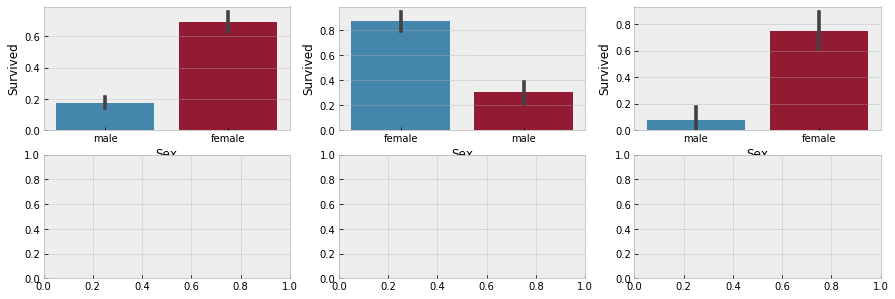

In [77]:
fig, ax = plt.subplots(nrows = 2, ncols = 3 ,figsize=(15,5))

sns.barplot(x='Sex', y='Survived', data=train[train['Embarked']=='S'], ax=ax[0,0])

sns.barplot(x='Sex', y='Survived', data=train[train['Embarked']=='C'], ax=ax[0,1])

sns.barplot(x='Sex', y='Survived', data=train[train['Embarked']=='Q'], ax=ax[0,2])



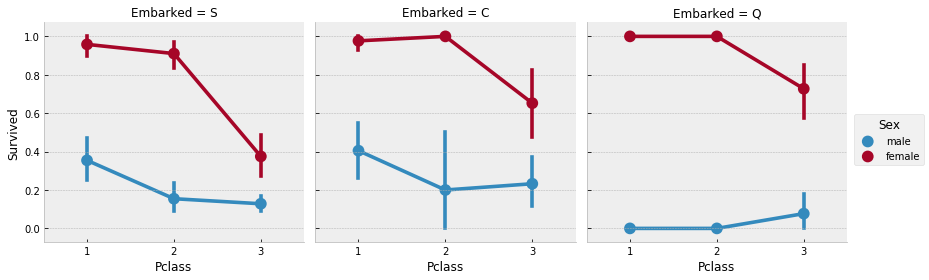

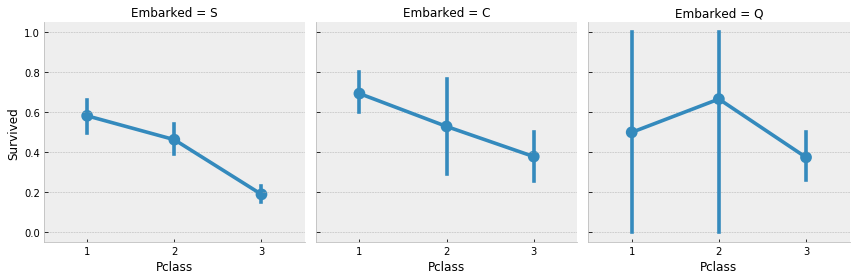

In [78]:
_ = sns.factorplot('Pclass', 'Survived', hue='Sex', col = 'Embarked', data=train)
_ = sns.factorplot('Pclass', 'Survived', col = 'Embarked', data=train)

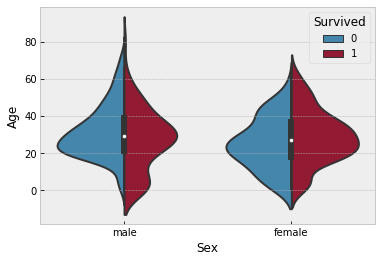

In [79]:
_ = sns.violinplot(x='Sex', y='Age', hue = 'Survived', data=train, split=True)

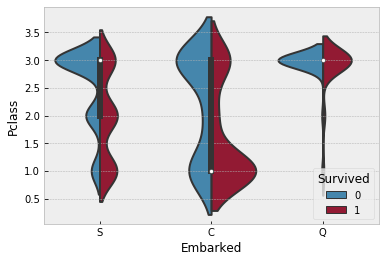

In [80]:
sns.violinplot(x='Embarked', y='Pclass', hue = 'Survived', data=train, split=True)

In [81]:
test = train
test['Embarked'] = [1 if x == 'S' else 2 if x=='C' else 3 for x in train['Embarked']]
print(train.head(15))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                

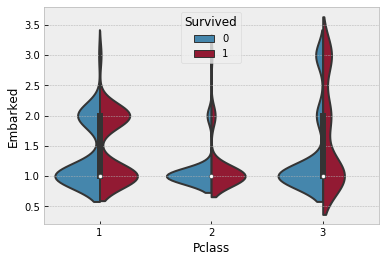

In [82]:
sns.violinplot(x='Pclass', y='Embarked', hue = 'Survived', data=train, split=True)

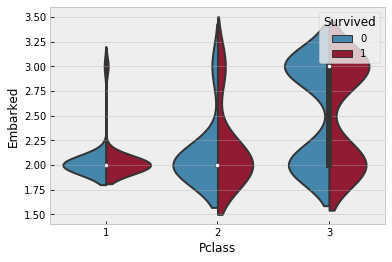

In [83]:
sns.violinplot(x='Pclass', y='Embarked', hue = 'Survived', data=train[train['Embarked']!=1], split=True)

In [84]:
print(train['Embarked'].value_counts())
for i in range(3):
    print('Port', i+1)
    Port = train[train['Embarked']==i+1]
    print(Port['Pclass'].value_counts())

1    644
2    168
3     79
Name: Embarked, dtype: int64
Port 1
3    353
2    164
1    127
Name: Pclass, dtype: int64
Port 2
1    85
3    66
2    17
Name: Pclass, dtype: int64
Port 3
3    72
1     4
2     3
Name: Pclass, dtype: int64


In [103]:
X=train
def cabin_l(X):
    return(
        X
        .Cabin
        .apply(lambda x: x!=x and 'o' or x[0].lower())
        .rename('cabin_l')
    )

def cabin_n(X):
    return(
        X
        .Cabin
        .str.lower()
        .str.extract(r'(\d+)', expand=False)
        .astype(np.float32)
        .rename('cabin_n')
    )

print(X.head(5))

X['cabin_l'] = cabin_l(X)
X['cabin_n'] = cabin_n(X)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked Cabin_l  
0      0         A/5 21171   7.2500   NaN         1       O  
1      0          PC 17599  71.2833   C85         2       C  
2      0  STON/O2. 3101282   7.9250   NaN         1       O  
3      0            113803  53.1000  C123         1       C  
4      0  

In [97]:

#print(xxx.head(5))


C:\Users\Shang\Anaconda3\lib\site-packages\seaborn\distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Shang\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


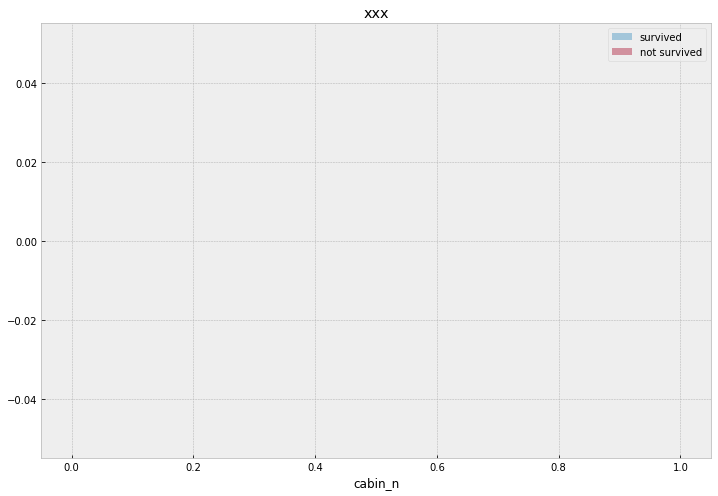

In [115]:
xxx = X[X['cabin_l']=='t']
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,8))
ax = sns.distplot(xxx[xxx['Survived']==1].cabin_n.dropna(), bins=5, label = sv_lab,  kde =False)
ax = sns.distplot(xxx[xxx['Survived']==0].cabin_n.dropna(), bins=5, label = nsv_lab, kde =False)
ax.legend()
_ = ax.set_title('xxx')

In [116]:
xxxx = X[X.cabin_l == 't']
print(xxxx)

     PassengerId  Survived  Pclass                          Name   Sex   Age  \
339          340         0       1  Blackwell, Mr. Stephen Weart  male  45.0   

     SibSp  Parch  Ticket  Fare Cabin  Embarked Cabin_l cabin_l  cabin_n  
339      0      0  113784  35.5     T         1       O       t      NaN  


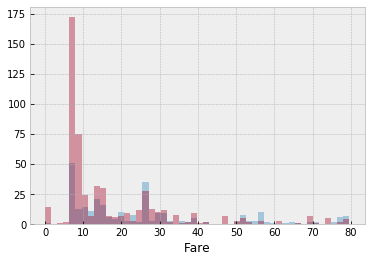

In [14]:
vv = train[(train.Fare < 80)]
sns.distplot(vv[vv['Survived']==1].Fare.dropna(), bins=50,  kde =False)
sns.distplot(vv[vv['Survived']==0].Fare.dropna(), bins=50,  kde =False)